In [1]:
import os
from PIL import Image
import numpy as np
import torch as t
from torch.utils.data import Dataset
 
class DogCat(Dataset):
    def __init__(self, root):
        imgs = os.listdir(root)
        # 所有图像的绝对路径
        # 这里不实际加载图像，只是指定路径，当调用 __getitem__ 是才会真正的读取图像
        self.imgs = [os.path.join(root, img) for img in imgs]
 
    # 此处可以添加异常处理，在获取图像出现异常时，随机返回一张图片（推荐），或返回 None
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 1 if 'dog' in img_path.split('/')[-1] else 0   # dog -> 1, cat -> 0
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        print(array)
        data = t.tensor(array)
        return data, label
 
    def __len__(self):
        return len(self.imgs)

[[[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [240 201 122]
  [239 200 121]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [238 199 120]]

 [[203 164  87]
  [203 164  87]
  [204 165  88]
  ...
  [241 202 123]
  [240 201 122]
  [239 200 121]]

 ...

 [[153 122  55]
  [153 122  55]
  [153 122  55]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[152 121  54]
  [152 121  54]
  [152 121  54]
  ...
  [  2   2   0]
  [  2   2   0]
  [  2   2   0]]

 [[151 120  53]
  [151 120  53]
  [151 120  53]
  ...
  [  1   1   0]
  [  1   1   0]
  [  1   1   0]]]
torch.Size([374, 500, 3]) tensor(119.7826) 0 

torch.Size([3, 374, 500])


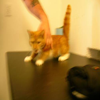

In [3]:
from torchvision.transforms import ToPILImage
show = ToPILImage()
 
root = './dataset/train/'
dataset = DogCat(root)
 
img, label = dataset[0]                                               # 相当于调用 dataset.__getitem__(0)
print(img.size(), img.float().mean(), label, '\n')
 
img1 = t.einsum('ijk->kij', img)                                 # 爱因斯坦球和操作，这里用来交换维度顺序
print(img1.size())
show(img1).resize((100, 100))